# Promises
Promises are a powerful and widely used concept in JavaScript for handling asynchronous operations in a more structured and readable way. They provide a cleaner alternative to callback functions and help manage complex asynchronous code by representing the eventual completion or failure of an operation.
Here are the key aspects of Promises:

States: A Promise can be in one of three states:

**Pending**: Initial state, before the operation is completed or rejected. <br>
**Fulfilled (Resolved)**: The operation completed successfully, and the Promise has a result value.<br>
**Rejected**: The operation encountered an error, and the Promise has an associated reason (error message or object).

In [ ]:
const getData = (urlToFetch) => {

    return new Promise((resolve, reject) => {
        const request = new XMLHttpRequest();

        request.addEventListener('readystatechange', () => {
            if (request.readyState === 4 && request.status === 200) {
                const data = JSON.parse(request.responseText);
                resolve(data);
            }
            else if (request.readyState === 4) {
                reject(urlToFetch)

            }

        });
        request.open('GET', urlToFetch)
        request.send();
    });
};

getData('https://jsonplaceholder.typicode.com/todos/1')
    .then(data => {
        console.log('Promise 1 Resolved: ', data);
    })

    .catch(url => {
        console.log('Promise Rejected for :', url);
    });


Succes: <br>
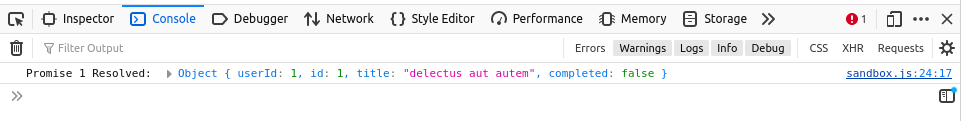
Failed: <br>
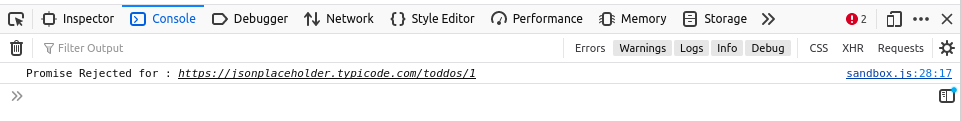

getData is called with the URL 'https://jsonplaceholder.typicode.com/todos/1'.

A **.then()** block is attached to the Promise returned by getData. If the request is successful, this block logs the resolved data.

A **.catch()** block is attached to the Promise as well. If there is an error during the request, it logs the rejected URL.


# Promise chaining
Promise chaining is a powerful technique in JavaScript for handling asynchronous operations sequentially. It allows you to execute a series of asynchronous tasks one after the other, ensuring that each task completes before moving on to the next one. However, there are situations where a problem in one promise can halt the entire chain.

Here's how promise chaining typically works:

You start with an initial promise.
You attach one or more .then() handlers to this promise, each of which returns a new promise.
Each .then() handler executes when the previous promise is resolved, and it can transform the resolved value or perform further asynchronous operations.
If an error occurs at any point in the chain (either explicitly with reject or due to an exception), the control jumps to the nearest .catch() block, and the subsequent .then() handlers are skipped.

In [ ]:
const getData = (urlToFetch) => {

    return new Promise((resolve, reject) => {
        const request = new XMLHttpRequest();

        request.addEventListener('readystatechange', () => {
            if (request.readyState === 4 && request.status === 200) {
                const data = JSON.parse(request.responseText);
                resolve(data);
            }
            else if (request.readyState === 4) {
                reject(urlToFetch)

            }

        });
        request.open('GET', urlToFetch)
        request.send();
    });
};

getData('https://jsonplaceholder.typicode.com/todos/1')
    .then(data => {
        console.log('Promise 1 Resolved: ', data);
        return getData('https://jsonplaceholder.typicode.com/todos/2');
    })
    .then(data => {
        console.log('Promise 2 Resolved: ', data)
        return getData('https://jsonplaceholder.typicode.com/todosf/3');
    })
    .then(data => {
        console.log('Promise 3 Resolved: ', data);
    })
    .catch(url => {
        console.log('Promise Rejected for :', url);
    });


out: <br>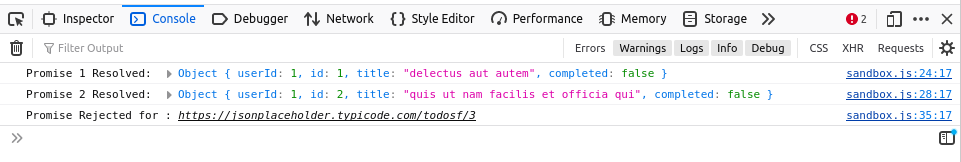

Failed in somewhere & further execution stopeed:
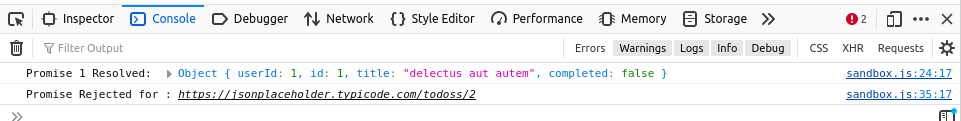

getData('https://jsonplaceholder.typicode.com/todos/1'): This initiates the first asynchronous operation by calling the getData function with a URL. It returns a Promise.

**.then(data => { ... }):** This attaches a .then() handler to the first Promise. When the first Promise resolves successfully, it logs the resolved data and then returns another Promise by calling getData with a different URL ('https://jsonplaceholder.typicode.com/todoss/2').

**.then(data => { ... }):** This attaches a second .then() handler to the second Promise. It logs the resolved data and then returns yet another Promise by calling getData with a third URL ('https://jsonplaceholder.typicode.com/todos/3').

**.then(data => { ... }):** This attaches a third .then() handler to the third Promise. It logs the resolved data.

**.catch(url => { ... }):** This is a single .catch() block at the end of the Promise chain. It catches any errors that occur during the execution of the Promises. If any of the Promises reject (e.g., due to an error in the HTTP request), this block logs the rejected URL

 **flow of execution:**

If all Promises resolve successfully (i.e., the HTTP requests are successful), you will see the resolved data logged for all three Promises.
If any of the Promises reject (e.g., due to a typo in the URL), the .catch() block will catch the error and log the URL that caused the rejection. The subsequent .then() blocks will be skipped